In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"C:\Users\quant\Downloads\archive\Reviews.csv", nrows=500)
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [5]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
df.Summary.head()
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [9]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()






<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\quant\AppData\Local\Temp\ipykernel_14436\2798993303.py:5: SyntaxWarning: invalid escape sequence '\w'
  df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
C:\Users\quant\AppData\Local\Temp\ipykernel_14436\2798993303.py:5: SyntaxWarning: invalid escape sequence '\w'
  df['Text'] = df['Text'].str.replace('[^\w\s]',' ')


ModuleNotFoundError: No module named 'textblob'

In [11]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/624.3 kB 660.6 kB/s eta 0:00:01
   - ------------------------------------- 30.7/624.3 kB 660.6 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/624.3 kB 196.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/624.3 kB 273.8 kB/s eta 0:00:03
   ------- ------------------------------ 122.9/624.3 kB 450.6 kB/s eta 0:00:02
   --------- ---------------------------- 163.8/624.3 kB 577.4 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/624.3 kB 476.3 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/624.3 kB 628.5 kB/s eta 0:00:01
   -------------------- ----------------- 337.9/624.3 kB 776.5 kB/s eta 0:00:01
   ------------------------ ------------- 409.6/624.3 kB 825.1 kB/s eta 0:00:01
   ---------------------------- --------- 471.0/624.3 kB 

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word
df = pd.read_csv(r"C:\Users\quant\Downloads\archive\Reviews.csv", nrows=500)
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)
nltk.download('stopwords')
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
nltk.download('wordnet')
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
splay results
print(df.Text.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\quant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanut p...
2    connection around century light pillow city ge...
3    looking secret ingredient robitussin believe f...
4    great staff great price wide assortment mummy ...
Name: Text, dtype: object


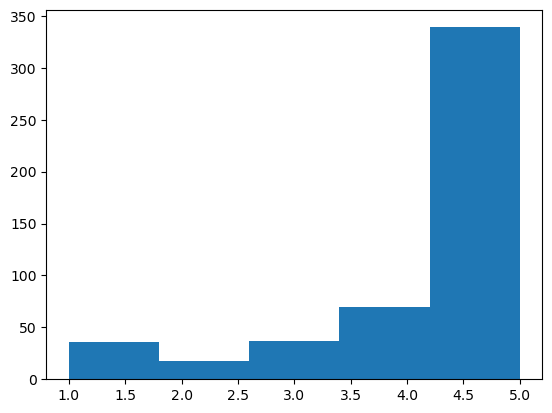

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [16]:
reviews = df
reviews.dropna(inplace=True) 
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [21]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

In [27]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


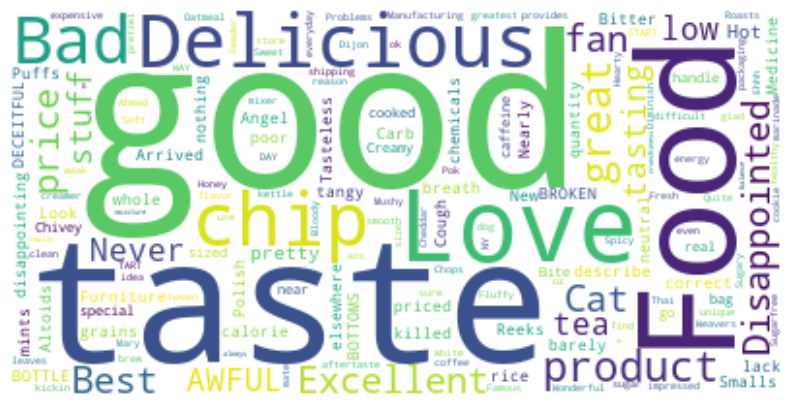

In [36]:
from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()